In [1]:
import time
start_time = time.time()
import os
HOME = os.environ['HOME']
# os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2/Tes3/Tes4')
os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2/Tes3')                    #2nd epoch
# os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2')                         #1st epoch

In [2]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import mad_std, sigma_clip
import warnings
warnings.filterwarnings("ignore")

import exoplanet as xo

from arctor3 import Arctor, info_message

In [3]:
transit1 = [0,512,300,513]
transit2 = [0,512,178,220]
transit3 = [0,512,150,180]

In [4]:
def instantiate_arctor(planet_name, transit, data_dir, working_dir, file_type):
    planet = Arctor(
        planet_name=planet_name,
        data_dir=data_dir,
        working_dir=working_dir,
        file_type=file_type)

    joblib_filename = f'{planet_name}_savedict.joblib.save'
    joblib_filename = f'{working_dir}/{joblib_filename}'
    if os.path.exists(joblib_filename):
        info_message('Loading Data from Save File')
        planet.load_data(joblib_filename)
    else:
        info_message('Loading New Data Object')
        planet.load_data(transit)

    return planet

def create_raw_lc_stddev(planet):
    ppm = 1e6
    phot_vals = planet.photometry_df
    lc_std_rev = phot_vals.iloc[planet.idx_rev].std(axis=0)                
    lc_std_fwd = phot_vals.iloc[planet.idx_fwd].std(axis=0)                

    lc_med_rev = np.median(phot_vals.iloc[planet.idx_rev], axis=0)
    lc_med_fwd = np.median(phot_vals.iloc[planet.idx_rev], axis=0)

    lc_std = np.mean([lc_std_rev, lc_std_fwd], axis=0)
    lc_med = np.mean([lc_med_rev, lc_med_fwd], axis=0)

    return lc_std / lc_med * ppm

In [5]:
plot_verbose = False
save_now = False
planet_name = 'PlanetName'
file_type = 'flt.fits'

HOME = os.environ['HOME']
# base_dir = os.path.join(HOME, 'path', 'to', 'base')
# data_dir = os.path.join(base_dir, 'path', 'to', 'data')
# data_dir = os.path.join(data_dir, 'HST', 'FLTs')
# working_dir = os.path.join(base_dir, 'path', 'to', 'savefiles')
base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2', 'Tes3')        #2nd epoch
# base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2')                #1st epoch
data_dir = os.path.join(base_dir)
data_dir = os.path.join(data_dir)
working_dir = os.path.join(base_dir)

In [6]:
transit = transit2
planet = instantiate_arctor(planet_name, transit, data_dir, working_dir, file_type)
print(planet)

[INFO] Initializing Instance of the `Arctor` Object
[INFO] Loading New Data Object
[INFO] Loading Fits Files


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 217.81it/s]


[INFO] Creating New Flux/Error/Time Attributes


  6%|█████▎                                                                              | 6/94 [00:00<00:01, 59.70it/s]

image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)


 22%|██████████████████▌                                                                | 21/94 [00:00<00:01, 57.02it/s]

image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)


 35%|█████████████████████████████▏                                                     | 33/94 [00:00<00:01, 56.95it/s]

image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)


 48%|███████████████████████████████████████▋                                           | 45/94 [00:00<00:00, 53.03it/s]

image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)


 54%|█████████████████████████████████████████████                                      | 51/94 [00:00<00:00, 46.37it/s]

image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)


 66%|██████████████████████████████████████████████████████▋                            | 62/94 [00:01<00:00, 48.52it/s]

image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)


 77%|███████████████████████████████████████████████████████████████▌                   | 72/94 [00:01<00:00, 43.82it/s]

image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)


 83%|████████████████████████████████████████████████████████████████████▊              | 78/94 [00:01<00:00, 46.40it/s]

image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)


 94%|█████████████████████████████████████████████████████████████████████████████▋     | 88/94 [00:01<00:00, 34.78it/s]

image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)
image_shape (512, 42)


100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [00:02<00:00, 45.42it/s]


image_shape (512, 42)
image_shape (512, 42)
[INFO] Found 94 flt.fits files


In [7]:
planet.clean_cosmic_rays()
planet.calibration_trace_location()
planet.identify_trace_direction()
planet.simple_phots()
planet.center_all_traces()
planet.fit_trace_slopes()
planet.compute_sky_background(subpixels=32)
planet.compute_columnwise_sky_background()

[INFO] Flagging Cosmic Rays using `Temporal Simple` Technique


100%|███████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 15.82it/s]


[INFO] Cosmic Ray Mask Creation Took 2.6621921062469482 seconds
None
[INFO] Calibration the Median Trace Location
[INFO] Cubic Spline Interpolating the Median Trace Location
[INFO] Calibration the Per Image Trace Location


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 880.70it/s]


[INFO] Identifying Trace Direction per Image


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 1652.05it/s]


[INFO] Computing the Center of the Trace


100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [00:27<00:00,  3.37it/s]


[INFO] Fitting a slope to the Center of the Trace


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 521.47it/s]


In [8]:
# Set up the list of aperture widths and heights to search
min_aper_width = 1
max_aper_width = 100
min_aper_height = 1
max_aper_height = 100

aper_widths = np.arange(min_aper_width, max_aper_width + 2, 5)
aper_heights = np.arange(min_aper_height, max_aper_height + 2, 5)

In [9]:
planet.do_multi_phot(aper_widths, aper_heights)
print("code took", (time.time()-start_time)/60, "minutes")

[INFO] Beginning Multi-Aperture Photometry
[21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21.] [348.607755   348.87380329 348.62861778 348.84363909 348.59433965
 348.84513315 348.5602805  348.80932783 348.59471912 348.80893552
 348.53311505 348.80262764 348.56887939 348.80588834 348.5327709
 348.79321865 348.54976224 348.79450089 348.53695368 348.79389016
 348.60247667 348.82250573 348.52370736 348.79583931 348.52510487
 348.80489158 348.58128692 348.8324566  348.5766536  348.8077868
 348.65814276 348.83666589 348.60885931 348.88638292 348.56588804
 348.85201085 348.62837004 348.89347642 348.60035436 348.82157804
 348.58858542 348.79163145 348.57522025 348.7896

100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 114.75it/s]


[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image
done 1
<multiprocessing.pool.Pool state=RUN pool_size=7>
done 2
[<QTable length=1>
  id  xcenter      ycenter         aperture_sum_0  ...  aperture_sum_438  aperture_sum_439  aperture_sum_440
        pix          pix                           ...                                                      
int64 float64      float64            float64      ...      float64           float64           float64     
----- ------- ------------------ ----------------- ... ----------------- ----------------- -----------------
    1    21.0 348.60775500392276 1781880.038453294 ... 6174420.263062445 6174420.263062445 6174420.263062445, <QTable length=1>
  id  xcenter      ycenter         aperture_sum_0   ...  aperture_sum_438  aperture_sum_439  aperture_sum_440
        pix          pix                            ...                                                      
int64 float64      float64           

    aperture_sum_1x1  aperture_sum_6x1  aperture_sum_11x1  aperture_sum_16x1  \
0       1.781880e+06      1.781880e+06       1.781880e+06       1.781880e+06   
1       1.931134e+06      1.931134e+06       1.931134e+06       1.931134e+06   
2       1.787159e+06      1.787159e+06       1.787159e+06       1.787159e+06   
3       1.897168e+06      1.897168e+06       1.897168e+06       1.897168e+06   
4       1.780943e+06      1.780943e+06       1.780943e+06       1.780943e+06   
..               ...               ...                ...                ...   
89      1.766247e+06      1.766247e+06       1.766247e+06       1.766247e+06   
90      1.660775e+06      1.660775e+06       1.660775e+06       1.660775e+06   
91      1.758758e+06      1.758758e+06       1.758758e+06       1.758758e+06   
92      1.642847e+06      1.642847e+06       1.642847e+06       1.642847e+06   
93      1.770036e+06      1.770036e+06       1.770036e+06       1.770036e+06   

    aperture_sum_21x1  aperture_sum_26x

In [10]:
planet_coarse_photometry_df = planet.photometry_df.copy()
planet.photometry_df


,aperture_sum_1x1,aperture_sum_6x1,aperture_sum_11x1,aperture_sum_16x1,aperture_sum_21x1,aperture_sum_26x1,aperture_sum_31x1,aperture_sum_36x1,aperture_sum_41x1,aperture_sum_46x1,...,aperture_sum_56x101,aperture_sum_61x101,aperture_sum_66x101,aperture_sum_71x101,aperture_sum_76x101,aperture_sum_81x101,aperture_sum_86x101,aperture_sum_91x101,aperture_sum_96x101,aperture_sum_101x101
0,1.781880e+06,1.781880e+06,1.781880e+06,1.781880e+06,1.781880e+06,1.781880e+06,1.781880e+06,1.781880e+06,1.781880e+06,1.781880e+06,...,6.174420e+06,6.174420e+06,6.174420e+06,6.174420e+06,6.174420e+06,6.174420e+06,6.174420e+06,6.174420e+06,6.174420e+06,6.174420e+06
1,1.931134e+06,1.931134e+06,1.931134e+06,1.931134e+06,1.931134e+06,1.931134e+06,1.931134e+06,1.931134e+06,1.931134e+06,1.931134e+06,...,6.180181e+06,6.180181e+06,6.180181e+06,6.180181e+06,6.180181e+06,6.180181e+06,6.180181e+06,6.180181e+06,6.180181e+06,6.180181e+06
2,1.787159e+06,1.787159e+06,1.787159e+06,1.787159e+06,1.787159e+06,1.787159e+06,1.787159e+06,1.787159e+06,1.787159e+06,1.787159e+06,...,6.200924e+06,6.200924e+06,6.200924e+06,6.200924e+06,6.200924e+06,6.200924e+06,6.200924e+06,6.200924e+06,6.200924e+06,6.200924e+06
3,1.897168e+06,1.897168e+06,1.897168e+06,1.897168e+06,1.897168e+06,1.897168e+06,1.897168e+06,1.897168e+06,1.897168e+06,1.897168e+06,...,6.173324e+06,6.173324e+06,6.173324e+06,6.173324e+06,6.173324e+06,6.173324e+06,6.173324e+06,6.173324e+06,6.173324e+06,6.173324e+06
4,1.780943e+06,1.780943e+06,1.780943e+06,1.780943e+06,1.780943e+06,1.780943e+06,1.780943e+06,1.780943e+06,1.780943e+06,1.780943e+06,...,6.206500e+06,6.206500e+06,6.206500e+06,6.206500e+06,6.206500e+06,6.206500e+06,6.206500e+06,6.206500e+06,6.206500e+06,6.206500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1.766247e+06,1.766247e+06,1.766247e+06,1.766247e+06,1.766247e+06,1.766247e+06,1.766247e+06,1.766247e+06,1.766247e+06,1.766247e+06,...,6.193530e+06,6.193530e+06,6.193530e+06,6.193530e+06,6.193530e+06,6.193530e+06,6.193530e+06,6.193530e+06,6.193530e+06,6.193530e+06
90,1.660775e+06,1.660775e+06,1.660775e+06,1.660775e+06,1.660775e+06,1.660775e+06,1.660775e+06,1.660775e+06,1.660775e+06,1.660775e+06,...,6.172384e+06,6.172384e+06,6.172384e+06,6.172384e+06,6.172384e+06,6.172384e+06,6.172384e+06,6.172384e+06,6.172384e+06,6.172384e+06
91,1.758758e+06,1.758758e+06,1.758758e+06,1.758758e+06,1.758758e+06,1.758758e+06,1.758758e+06,1.758758e+06,1.758758e+06,1.758758e+06,...,6.170672e+06,6.170672e+06,6.170672e+06,6.170672e+06,6.170672e+06,6.170672e+06,6.170672e+06,6.170672e+06,6.170672e+06,6.170672e+06
92,1.642847e+06,1.642847e+06,1.642847e+06,1.642847e+06,1.642847e+06,1.642847e+06,1.642847e+06,1.642847e+06,1.642847e+06,1.642847e+06,...,6.192538e+06,6.192538e+06,6.192538e+06,6.192538e+06,6.192538e+06,6.192538e+06,6.192538e+06,6.192538e+06,6.192538e+06,6.192538e+06


In [11]:
coarse_snr_lightcurves = create_raw_lc_stddev(planet)
coarse_min_snr = coarse_snr_lightcurves[coarse_snr_lightcurves.argmin()]
coarse_min_snr_colname = planet.photometry_df.columns[coarse_snr_lightcurves.argmin()]
coarse_min_snr_col = planet.normed_photometry_df[coarse_min_snr_colname]
coarse_temp = coarse_min_snr_colname.split('_')[-1].split('x')
coarse_min_snr_aper_width, coarse_min_snr_aper_height = np.int32(coarse_temp)

In [12]:
info_message(f'Coarse Aperture Photometry Resulted in {coarse_min_snr:0.0f}ppm with '
             f'{coarse_min_snr_aper_width}x{coarse_min_snr_aper_height} aperture size')

[INFO] Coarse Aperture Photometry Resulted in 1820ppm with 1x101 aperture size


In [13]:
fine_buffer = 10
fine_aper_widths = np.arange(coarse_min_snr_aper_width - fine_buffer,
                             coarse_min_snr_aper_width + fine_buffer)

fine_aper_heights = np.arange(coarse_min_snr_aper_height - fine_buffer,
                              coarse_min_snr_aper_height + fine_buffer)

[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10] [ 91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110]
1 101


In [14]:
planet.do_multi_phot(fine_aper_widths, fine_aper_heights)

[INFO] Beginning Multi-Aperture Photometry
[21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21.] [348.607755   348.87380329 348.62861778 348.84363909 348.59433965
 348.84513315 348.5602805  348.80932783 348.59471912 348.80893552
 348.53311505 348.80262764 348.56887939 348.80588834 348.5327709
 348.79321865 348.54976224 348.79450089 348.53695368 348.79389016
 348.60247667 348.82250573 348.52370736 348.79583931 348.52510487
 348.80489158 348.58128692 348.8324566  348.5766536  348.8077868
 348.65814276 348.83666589 348.60885931 348.88638292 348.56588804
 348.85201085 348.62837004 348.89347642 348.60035436 348.82157804
 348.58858542 348.79163145 348.57522025 348.7896

100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 126.58it/s]

[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image
done 1


<multiprocessing.pool.Pool state=RUN pool_size=7>
done 2
[<QTable length=1>
  id  xcenter      ycenter         aperture_sum_0  ...  aperture_sum_397  aperture_sum_398  aperture_sum_399
        pix          pix                           ...                                                      
int64 float64      float64            float64      ...      float64           float64           float64     
----- ------- ------------------ ----------------- ... ----------------- ----------------- -----------------
    1    21.0 348.60775500392276 4867036.455977539 ... 6175752.064731339 6175752.064731339 6175752.064731339, <QTable length=1>
  id  xcenter      ycenter         aperture_sum_0  ...  aperture_sum_397  aperture_sum_398  aperture_sum_399
        pix          pix                           ...                                                      
int64 float64      float64            float64      ...      float64           float64           float64     
----- ------- ------------------ 

    aperture_sum_-9x91  aperture_sum_-8x91  aperture_sum_-7x91  \
0         4.867036e+06        5.012365e+06        5.157639e+06   
1         4.854187e+06        5.000030e+06        5.145872e+06   
2         4.872399e+06        5.019461e+06        5.166587e+06   
3         4.852002e+06        4.997621e+06        5.143241e+06   
4         4.870543e+06        5.018399e+06        5.166196e+06   
..                 ...                 ...                 ...   
89        4.838658e+06        4.984264e+06        5.129868e+06   
90        4.867992e+06        5.014697e+06        5.161337e+06   
91        4.846484e+06        4.991861e+06        5.137238e+06   
92        4.841729e+06        4.988701e+06        5.135698e+06   
93        4.857141e+06        5.001883e+06        5.146625e+06   

    aperture_sum_-6x91  aperture_sum_-5x91  aperture_sum_-4x91  \
0         5.302458e+06        5.447240e+06        5.592363e+06   
1         5.292695e+06        5.439513e+06        5.587662e+06   
2        

[INFO] Adding column aperture_sum_2x96 to self.photometry_df
[INFO] Adding column aperture_sum_3x96 to self.photometry_df
[INFO] Adding column aperture_sum_4x96 to self.photometry_df
[INFO] Adding column aperture_sum_5x96 to self.photometry_df
[INFO] Adding column aperture_sum_7x96 to self.photometry_df
[INFO] Adding column aperture_sum_8x96 to self.photometry_df
[INFO] Adding column aperture_sum_9x96 to self.photometry_df
[INFO] Adding column aperture_sum_10x96 to self.photometry_df
[INFO] Adding column aperture_sum_-9x97 to self.photometry_df
[INFO] Adding column aperture_sum_-8x97 to self.photometry_df
[INFO] Adding column aperture_sum_-7x97 to self.photometry_df
[INFO] Adding column aperture_sum_-6x97 to self.photometry_df
[INFO] Adding column aperture_sum_-5x97 to self.photometry_df
[INFO] Adding column aperture_sum_-4x97 to self.photometry_df
[INFO] Adding column aperture_sum_-3x97 to self.photometry_df
[INFO] Adding column aperture_sum_-2x97 to self.photometry_df
[INFO] Adding c

[INFO] Adding column aperture_sum_6x103 to self.photometry_df
[INFO] Adding column aperture_sum_7x103 to self.photometry_df
[INFO] Adding column aperture_sum_8x103 to self.photometry_df
[INFO] Adding column aperture_sum_9x103 to self.photometry_df
[INFO] Adding column aperture_sum_10x103 to self.photometry_df
[INFO] Adding column aperture_sum_-9x104 to self.photometry_df
[INFO] Adding column aperture_sum_-8x104 to self.photometry_df
[INFO] Adding column aperture_sum_-7x104 to self.photometry_df
[INFO] Adding column aperture_sum_-6x104 to self.photometry_df
[INFO] Adding column aperture_sum_-5x104 to self.photometry_df
[INFO] Adding column aperture_sum_-4x104 to self.photometry_df
[INFO] Adding column aperture_sum_-3x104 to self.photometry_df
[INFO] Adding column aperture_sum_-2x104 to self.photometry_df
[INFO] Adding column aperture_sum_-1x104 to self.photometry_df
[INFO] Adding column aperture_sum_0x104 to self.photometry_df
[INFO] Adding column aperture_sum_1x104 to self.photometry_d

[INFO] Adding column aperture_sum_0x110 to self.photometry_df
[INFO] Adding column aperture_sum_1x110 to self.photometry_df
[INFO] Adding column aperture_sum_2x110 to self.photometry_df
[INFO] Adding column aperture_sum_3x110 to self.photometry_df
[INFO] Adding column aperture_sum_4x110 to self.photometry_df
[INFO] Adding column aperture_sum_5x110 to self.photometry_df
[INFO] Adding column aperture_sum_6x110 to self.photometry_df
[INFO] Adding column aperture_sum_7x110 to self.photometry_df
[INFO] Adding column aperture_sum_8x110 to self.photometry_df
[INFO] Adding column aperture_sum_9x110 to self.photometry_df
[INFO] Adding column aperture_sum_10x110 to self.photometry_df


In [15]:
planet_fine_photometry_df = planet.photometry_df.copy()

In [16]:
fine_snr_lightcurves = create_raw_lc_stddev(planet)
fine_min_snr = fine_snr_lightcurves[fine_snr_lightcurves.argmin()]
fine_min_snr_colname = planet.photometry_df.columns[fine_snr_lightcurves.argmin()]
fine_min_snr_flux = planet.normed_photometry_df[fine_min_snr_colname]
fine_min_snr_uncs = planet.normed_uncertainty_df[fine_min_snr_colname]
fine_temp = fine_min_snr_colname.split('_')[-1].split('x')
fine_min_snr_aper_width, fine_min_snr_aper_height = np.int32(fine_temp)

In [17]:
info_message(f'Fine Aperture Photometry Resulted in {fine_min_snr:0.0f}ppm with '
             f'{fine_min_snr_aper_width}x{fine_min_snr_aper_height} aperture size; '
             f'with median uncertainties of {np.median(fine_min_snr_uncs)*1e6:0.0f} ppm')

[INFO] Fine Aperture Photometry Resulted in 1759ppm with -1x110 aperture size; with median uncertainties of 407 ppm


In [18]:
data_df = pd.DataFrame()
data_df['flux'] = fine_min_snr_flux.values
data_df['unc'] = fine_min_snr_uncs.values
data_df['times'] = planet.times
idx_fwd = planet.idx_fwd
idx_rev = planet.idx_rev
# data_df.sort_values('times', inplace=True)
# data_df = data_df.reset_index()
# data_df.drop(['index'], axis=1, inplace=True)
data_df

,flux,unc,times
0,0.998246,0.000407,59486.596360
1,1.000018,0.000407,59486.597239
2,1.002207,0.000407,59486.598119
3,0.998555,0.000407,59486.598998
4,1.003131,0.000408,59486.599878
...,...,...,...
89,1.000979,0.000407,59486.750144
90,0.998748,0.000407,59486.751024
91,0.997643,0.000407,59486.751903
92,1.000584,0.000407,59486.752783


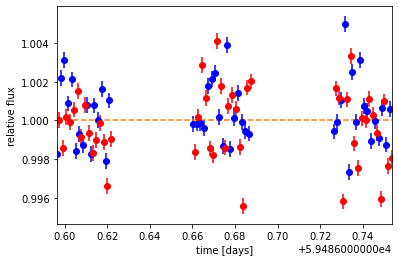

In [19]:
# Compute a limb-darkened light curve using starry
t = data_df['times']
u = []
flux = data_df['flux']
yerr = data_df['unc']
# Note: the `eval` is needed because this is using Theano in
# the background

plt.errorbar(t[idx_fwd], flux[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], flux[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

In [20]:
fluxppm = (data_df['flux'] - 1)*1e6

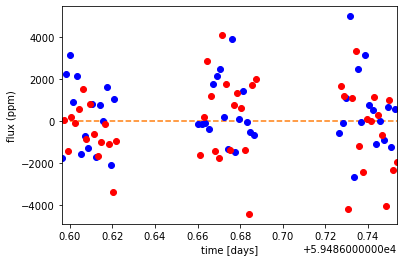

In [21]:
plt.errorbar(t[idx_fwd], fluxppm[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], fluxppm[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("flux (ppm)")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

In [ ]:
print("code took", (time.time()-start_time)/60, "minutes")